In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import csv

In [2]:
# get data from csv files
gfk_data = pd.read_csv('GFK.csv')
mco_data = pd.read_csv('MCO.csv')
sfo_data = pd.read_csv('SFO.csv')

/var/folders/06/psvnwwys3wb8jvz_dtrft5080000gn/T/ipykernel_17015/1215131069.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  gfk_data = pd.read_csv('GFK.csv')
/var/folders/06/psvnwwys3wb8jvz_dtrft5080000gn/T/ipykernel_17015/1215131069.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  mco_data = pd.read_csv('MCO.csv')
/var/folders/06/psvnwwys3wb8jvz_dtrft5080000gn/T/ipykernel_17015/1215131069.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  sfo_data = pd.read_csv('SFO.csv')


In [3]:
with open ('GFK.csv') as f:
    last_line_gfk = f.readlines()[-1]
    print(last_line_gfk)

with open ('MCO.csv') as f:
    last_line_mco = f.readlines()[-1]
    print(last_line_mco)
    
with open ('SFO.csv') as f:
    last_line_sfo = f.readlines()[-1]
    print(last_line_sfo)
with open ('SOI.csv') as f:
    last_line_soi = f.readlines()[-1]
    print(last_line_soi)

GFK,2023-01-01 00:53,0.00,0.00,M

MCO,2023-01-01 00:53,0.00,0.00,M

SFO,2023-01-01 00:56,0.00,0.00,M
2022,0.5,1.1,1.8,1.7,1.4,1.7,0.8,1.0,1.6,1.7,0.3,2.1


In [4]:
dr = pd.date_range('2003-01','2022-12', freq = 'MS').strftime('%Y-%m')

In [5]:
df = pd.DataFrame(index = dr, columns = ['GFK_temp', 'GFK_precip', 'MCO_temp', 'MCO_precip', 'SFO_temp', 'SFO_precip','SOI','Year','Month'])
df

,GFK_temp,GFK_precip,MCO_temp,MCO_precip,SFO_temp,SFO_precip,SOI,Year,Month
2003-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
curr_month_temps = []
previous_month_val = '2003-01'
with open ('gfk.csv') as f:
    headers = f.readline()
    for line in f:
        line = line.strip().split(',')
        date = line[1]
        date = datetime.strptime(date, '%Y-%m-%d %H:%M')
        date = date.strftime('%Y-%m')
        try:
            temp = float(line[2])
            
        except ValueError:
            temp = np.nan
        if date == previous_month_val:
            curr_month_temps.append(temp)
        else:
            mean = np.nanmean(np.array(curr_month_temps))
            df['GFK_temp'][previous_month_val] = mean
            previous_month_val = date
            curr_month_temps = []
            curr_month_temps.append(temp)

In [7]:
curr_month_precip = []
previous_month_val = '2003-01'
with open ('gfk.csv') as f:
    headers = f.readline()
    for line in f:
        line = line.strip().split(',')
        date = line[1]
        date = datetime.strptime(date, '%Y-%m-%d %H:%M')
        date = date.strftime('%Y-%m')
        try:
            precip = float(line[3])
            
        except ValueError:
            precip = np.nan
        if date == previous_month_val:
            curr_month_precip.append(precip)
        else:
            tot_precip = np.nansum(np.array(curr_month_precip))
            df['GFK_precip'][previous_month_val] = tot_precip
            previous_month_val = date
            curr_month_precip = []
            curr_month_precip.append(precip)

In [8]:
curr_month_temps = []
previous_month_val = '2003-01'
with open ('mco.csv') as f:
    headers = f.readline()
    for line in f:
        line = line.strip().split(',')
        date = line[1]
        date = datetime.strptime(date, '%Y-%m-%d %H:%M')
        date = date.strftime('%Y-%m')
        try:
            temp = float(line[2])
            
        except ValueError:
            temp = np.nan
        if date == previous_month_val:
            curr_month_temps.append(temp)
        else:
            mean = np.nanmean(np.array(curr_month_temps))
            df['MCO_temp'][previous_month_val] = mean
            previous_month_val = date
            curr_month_temps = []
            curr_month_temps.append(temp)

In [9]:
curr_month_precip = []
previous_month_val = '2003-01'
with open ('mco.csv') as f:
    headers = f.readline()
    for line in f:
        line = line.strip().split(',')
        date = line[1]
        date = datetime.strptime(date, '%Y-%m-%d %H:%M')
        date = date.strftime('%Y-%m')
        try:
            precip = float(line[3])
            
        except ValueError:
            precip = np.nan
        if date == previous_month_val:
            curr_month_precip.append(precip)
        else:
            tot_precip = np.nansum(np.array(curr_month_precip))
            df['MCO_precip'][previous_month_val] = tot_precip
            previous_month_val = date
            curr_month_precip = []
            curr_month_precip.append(precip)

In [10]:
curr_month_temps = []
previous_month_val = '2003-01'
with open ('sfo.csv') as f:
    headers = f.readline()
    for line in f:
        line = line.strip().split(',')
        date = line[1]
        date = datetime.strptime(date, '%Y-%m-%d %H:%M')
        date = date.strftime('%Y-%m')
        try:
            temp = float(line[2])
            
        except ValueError:
            temp = np.nan
        if date == previous_month_val:
            curr_month_temps.append(temp)
        else:
            mean = np.nanmean(np.array(curr_month_temps))
            df['SFO_temp'][previous_month_val] = mean
            previous_month_val = date
            curr_month_temps = []
            curr_month_temps.append(temp)

In [11]:
curr_month_precip = []
previous_month_val = '2003-01'
with open ('sfo.csv') as f:
    headers = f.readline()
    for line in f:
        line = line.strip().split(',')
        date = line[1]
        date = datetime.strptime(date, '%Y-%m-%d %H:%M')
        date = date.strftime('%Y-%m')
        try:
            precip = float(line[3])
            
        except ValueError:
            precip = np.nan
        if date == previous_month_val:
            curr_month_precip.append(precip)
        else:
            tot_precip = np.nansum(np.array(curr_month_precip))
            df['SFO_precip'][previous_month_val] = tot_precip
            previous_month_val = date
            curr_month_precip = []
            curr_month_precip.append(precip)

In [12]:
jan_soi=[]
feb_soi=[]
mar_soi=[]
apr_soi=[]
may_soi=[]
jun_soi=[]
jul_soi=[]
aug_soi=[]
sep_soi=[]
oct_soi=[]
nov_soi=[]
dec_soi=[]

In [13]:
with open('soi.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        jan_soi.append(row[1])
        feb_soi.append(row[2])
        mar_soi.append(row[3])
        apr_soi.append(row[4])
        may_soi.append(row[5])
        jun_soi.append(row[6])
        jul_soi.append(row[7])
        aug_soi.append(row[8])
        sep_soi.append(row[9])
        oct_soi.append(row[10])
        nov_soi.append(row[11])
        dec_soi.append(row[12])

[-0.2, -1.3, 0.3, 1.7, -0.8, 1.8, 1.1, -1.1, 2.3, 1.1, -0.1, 1.4, -0.8, -2.2, 0.2, 1.1, 0.0, 0.2, 1.9, 0.5]


In [42]:
jan_SOI = [float(x) for x in jan_soi]
feb_SOI = [float(x) for x in feb_soi]
mar_SOI = [float(x) for x in mar_soi]
apr_SOI = [float(x) for x in apr_soi]
may_SOI = [float(x) for x in may_soi]
jun_SOI = [float(x) for x in jun_soi]
jul_SOI = [float(x) for x in jul_soi]
aug_SOI = [float(x) for x in aug_soi]
sep_SOI = [float(x) for x in sep_soi]
oct_SOI = [float(x) for x in oct_soi]
nov_SOI = [float(x) for x in nov_soi]
dec_SOI = [float(x) for x in dec_soi]
print(jan_SOI)

[-0.2, -1.3, 0.3, 1.7, -0.8, 1.8, 1.1, -1.1, 2.3, 1.1, -0.1, 1.4, -0.8, -2.2, 0.2, 1.1, 0.0, 0.2, 1.9, 0.5]


In [43]:
print(type(jan_SOI[0]))

<class 'float'>


In [14]:
df['Date'] = df.index
dates = df.index
dates_dt = np.array([datetime.strptime(i,'%Y-%m') for i in dates])
months = np.array([int(i.month) for i in dates_dt])
years = np.array([int(i.year) for i in dates_dt])

df['Year'] = years
df['Month'] = months

In [15]:
df

,GFK_temp,GFK_precip,MCO_temp,MCO_precip,SFO_temp,SFO_precip,SOI,Year,Month,Date
2003-01,8.734069,0.0704,53.92578,0.8107,53.651532,1.463,NaN,2003,1,2003-01
2003-02,5.150462,0.0786,63.273661,1.5837,52.153483,2.4517,NaN,2003,2,2003-02
2003-03,21.456944,0.3903,70.625082,5.2829,55.123978,1.1721,NaN,2003,3,2003-03
2003-04,42.962682,0.7255,70.559244,4.3225,53.570879,4.4249,NaN,2003,4,2003-04
2003-05,54.528145,4.1972,79.074347,2.4314,57.350135,0.632,NaN,2003,5,2003-05
...,...,...,...,...,...,...,...,...,...,...
2022-08,69.29717,1.4238,82.652419,7.8357,65.054105,0.0104,NaN,2022,8,2022-08
2022-09,60.610282,0.5338,79.839276,22.4158,65.863889,0.2713,NaN,2022,9,2022-09
2022-10,46.310887,0.1754,74.279004,2.1409,59.590323,0.0104,NaN,2022,10,2022-10
2022-11,26.321359,0.5352,71.496117,4.2775,53.167406,1.5814,NaN,2022,11,2022-11


In [34]:
month_number = 1
df_sub = df[df['Month']==month_number]
if month_number == 1:
    df_sub['SOI']=jan_soi
elif month_number == 2:
    df_sub['SOI']=feb_soi
elif month_number == 3:
    df_sub['SOI']=mar_soi
elif month_number == 4:
    df_sub['SOI']=apr_soi
elif month_number == 5:
    df_sub['SOI']=may_soi
elif month_number == 6:
    df_sub['SOI']=jun_soi
elif month_number == 7:
    df_sub['SOI']=jul_soi
elif month_number == 8:
    df_sub['SOI']=aug_soi
elif month_number == 9:
    df_sub['SOI']=sep_soi
elif month_number == 10:
    df_sub['SOI']=oct_soi
elif month_number == 11:
    df_sub['SOI']=nov_soi
elif month_number == 12:
    df_sub['SOI']=dec_soi
df_sub

/var/folders/06/psvnwwys3wb8jvz_dtrft5080000gn/T/ipykernel_17015/2361010818.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['SOI']=jan_soi


,GFK_temp,GFK_precip,MCO_temp,MCO_precip,SFO_temp,SFO_precip,SOI,Year,Month,Date
2003-01,8.734069,0.0704,53.92578,0.8107,53.651532,1.463,-0.2,2003,1,2003-01
2004-01,-0.530488,0.0193,58.509179,3.2519,50.388065,3.0335,-1.3,2004,1,2004-01
2005-01,1.574178,0.8902,61.404704,3.3332,49.520593,4.2757,0.3,2005,1,2005-01
2006-01,22.021865,0.5219,62.499865,0.422,51.476496,2.4465,1.7,2006,1,2006-01
2007-01,10.912,0.2974,63.494654,1.7346,47.908356,0.6522,-0.8,2007,1,2007-01
2008-01,4.590566,0.0701,60.911911,3.7246,48.373948,8.1689,1.8,2008,1,2008-01
2009-01,0.589501,0.3692,58.668086,2.0617,51.119758,0.6223,1.1,2009,1,2009-01
2010-01,8.087634,0.7294,53.908733,3.5022,50.942803,5.8083,-1.1,2010,1,2010-01
2011-01,1.389896,0.9627,59.094282,6.3431,50.111022,0.9428,2.3,2011,1,2011-01
2012-01,17.373306,0.4291,59.982551,0.1313,50.397742,2.1632,1.1,2012,1,2012-01


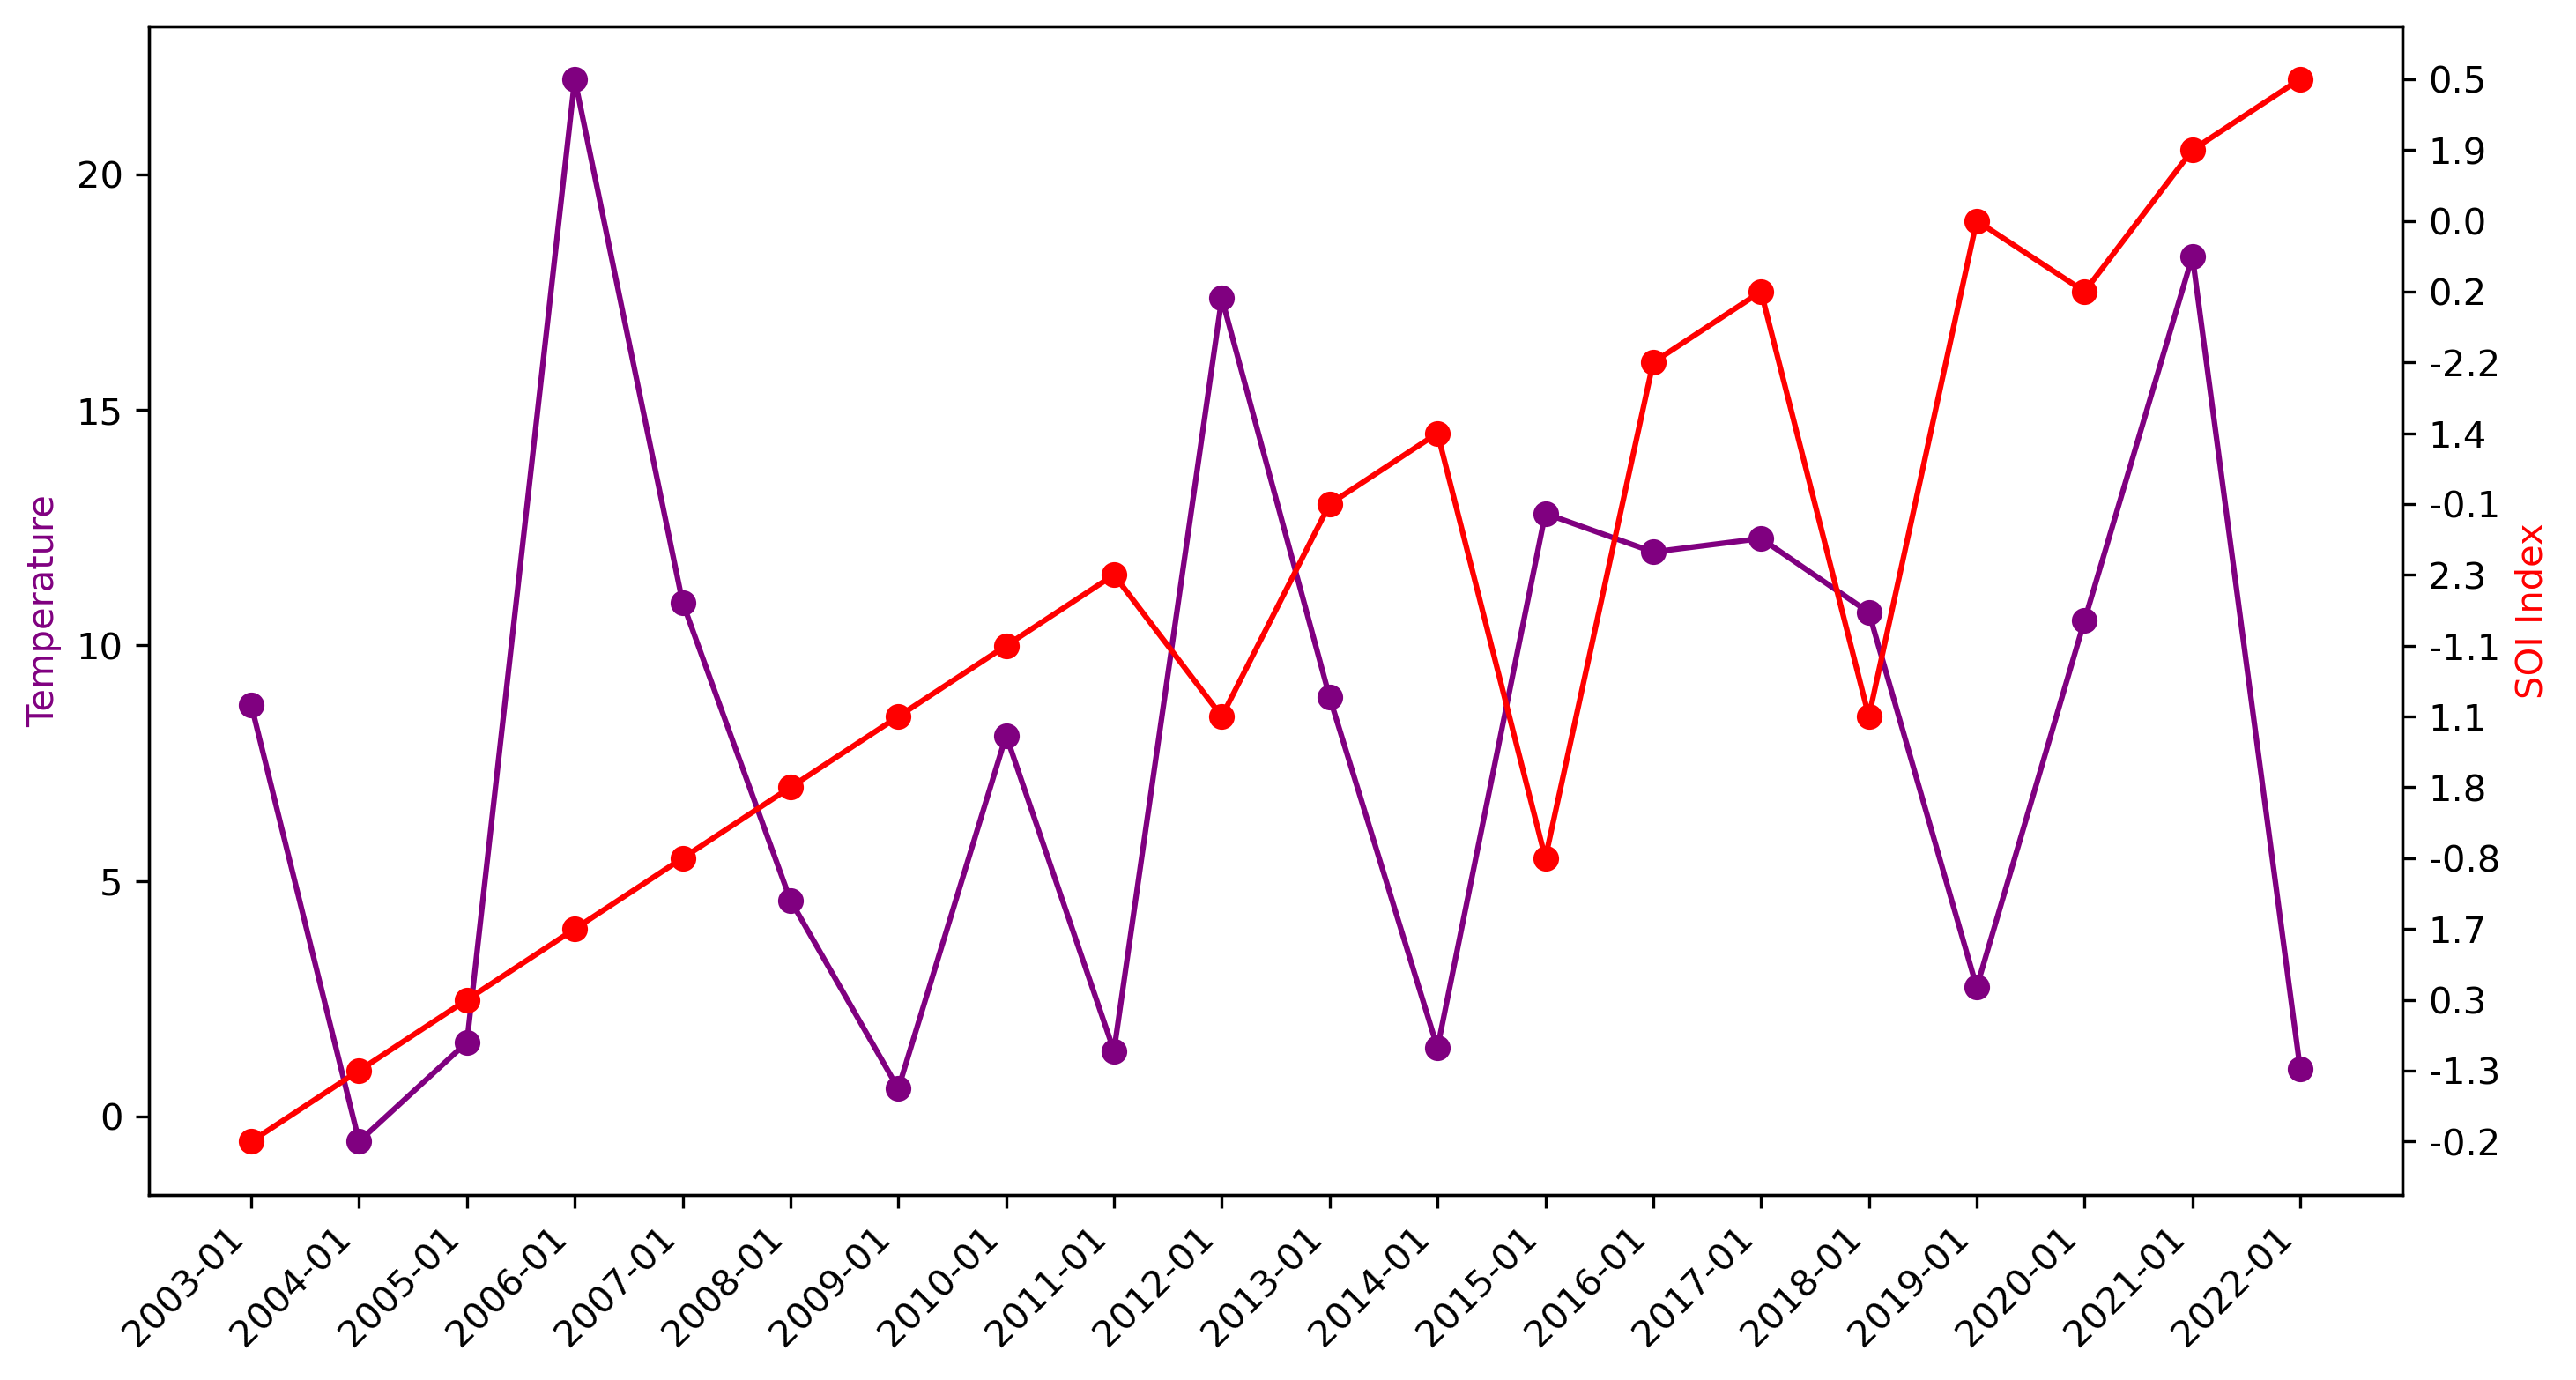

In [44]:
fig = plt.figure(figsize=(11,6.5),dpi=300)
ax = fig.add_subplot(1,1,1)
ax.scatter(df_sub['Date'],df_sub['GFK_temp'],color='purple')
ax.plot(df_sub['Date'],df_sub['GFK_temp'],color='purple')
ax.set_ylabel('Temperature', color='purple')
ax2 = ax.twinx()
ax2.scatter(df_sub['Date'],df_sub['SOI'],color='red')
ax2.plot(df_sub['Date'],df_sub['SOI'],color='red')
ax2.set_ylabel('SOI Index', color='red')
#plt.ylim(-3.5,3.5)
fig.autofmt_xdate(rotation=45)
plt.show()